In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data = pd.read_csv('charlottsville_clean_large.csv')

C:\Users\oluba\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [73]:
data.head()

,user,num_statuses,no_of_favs,num_friends,self_reported_location,num_followers,full_text,in_reply_to_screen_name,retweet_count,quoted_status_permalink,created_at,user_lang
0,WorkingMIGirl,82270,61044,4568,United States,3675,"' ""When asked to condemn, he just walked out o...",NaN,1,"{'display': 'twitter.com/KDavidSmithAut…', 'ex...",2017-08-14 21:31:06+00:00,en
1,MakeHerWETWest,207870,4170,843,Flint.,1558,- LOOK AT GOD 🗣 https://t.co/KxaP6pyZVK,NaN,1,"{'display': 'twitter.com/wafb/status/89…', 'ex...",2017-08-14 18:16:37+00:00,en
2,Jet_Blvck_Bitxh,2883,1163,281,BK✈️VA,266,- Put a Meme on this LMFAOOOO #Charlottesville...,NaN,1,NaN,2017-08-14 18:06:07+00:00,en
3,CramerSez,13197,1999,2541,"Indiana, USA",3429,-\nMore #fakenews from liberals in attempt to ...,NaN,0,NaN,2017-08-14 19:23:47+00:00,en
4,CramerSez,13237,2010,2729,"Indiana, USA",3521,"-\nThe only reason #MSM, #Democrats, #BlackLiv...",NaN,0,NaN,2017-08-14 22:48:48+00:00,en


#### EDA

In [74]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223815 entries, 0 to 223814
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   user                     223815 non-null  object
 1   num_statuses             223815 non-null  int64 
 2   no_of_favs               223815 non-null  int64 
 3   num_friends              223815 non-null  int64 
 4   self_reported_location   161630 non-null  object
 5   num_followers            223815 non-null  int64 
 6   full_text                223815 non-null  object
 7   in_reply_to_screen_name  5777 non-null    object
 8   retweet_count            223815 non-null  int64 
 9   quoted_status_permalink  85383 non-null   object
 10  created_at               223815 non-null  object
 11  user_lang                223815 non-null  object
dtypes: int64(5), object(7)
memory usage: 20.5+ MB


,num_statuses,no_of_favs,num_friends,num_followers,retweet_count
count,2.238150e+05,2.238150e+05,223815.000000,2.238150e+05,223815.000000
mean,6.443623e+04,5.135352e+04,2491.795997,6.918494e+03,11084.149874
std,1.094668e+05,8.378448e+04,7399.975402,1.872624e+05,26281.183601
min,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,8.401000e+03,5.237500e+03,349.000000,2.560000e+02,13.000000
50%,2.714200e+04,2.056300e+04,848.000000,7.330000e+02,541.000000
75%,7.518400e+04,6.072150e+04,2461.000000,2.341000e+03,8334.000000
max,3.413586e+06,1.498512e+06,848619.000000,4.388326e+07,134300.000000


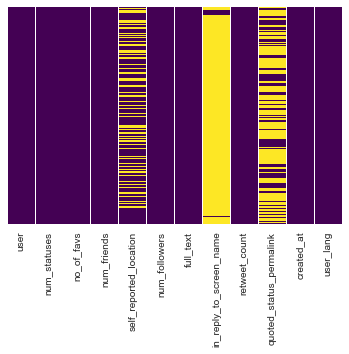

In [75]:
# Visualize missing values

sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [76]:
data.columns

Index(['user', 'num_statuses', 'no_of_favs', 'num_friends',
       'self_reported_location', 'num_followers', 'full_text',
       'in_reply_to_screen_name', 'retweet_count', 'quoted_status_permalink',
       'created_at', 'user_lang'],
      dtype='object')

In [77]:
# Drop some columns that has no numerical values

data2 = data.drop(['self_reported_location', 'in_reply_to_screen_name',
                   'quoted_status_permalink'], axis =1)

In [78]:
# Add new features from datetime stamp.
# We focus only on the hour of the day, since all tweets are from the same date.month.year

def extract_hour(x):
    hour = pd.DatetimeIndex(x).hour
    return hour

In [79]:
# Add new feature to dataframe

data2['hours'] = extract_hour(data2['created_at'])

In [80]:
data2.head(2)

,user,num_statuses,no_of_favs,num_friends,num_followers,full_text,retweet_count,created_at,user_lang,hours
0,WorkingMIGirl,82270,61044,4568,3675,"' ""When asked to condemn, he just walked out o...",1,2017-08-14 21:31:06+00:00,en,21
1,MakeHerWETWest,207870,4170,843,1558,- LOOK AT GOD 🗣 https://t.co/KxaP6pyZVK,1,2017-08-14 18:16:37+00:00,en,18


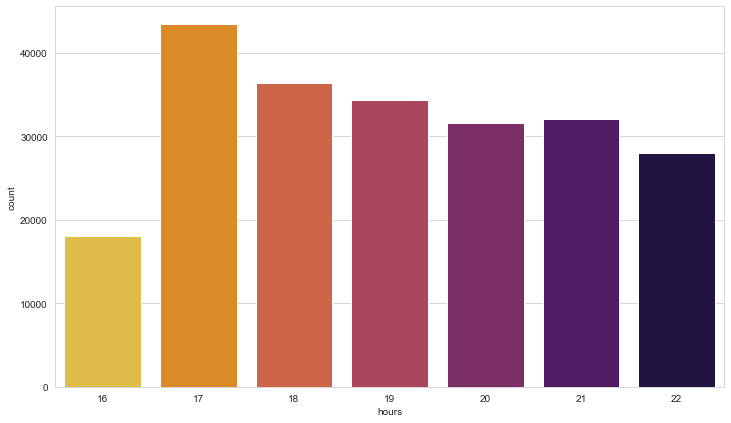

In [81]:

sns.set_style(style='whitegrid')
plt.figure(figsize=(12, 7))
sns.countplot(data2['hours'], palette='inferno_r')
plt.savefig("Tweets_by_hour.png")

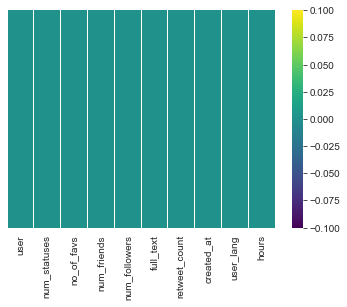

In [82]:
sns.heatmap(data2.isnull(), cmap='viridis', yticklabels=False)

In [83]:
# I tried to check what language the tweets were written in, if english, then I fill then up as 'en'

data2[data2['user_lang'] != 'en']

,user,num_statuses,no_of_favs,num_friends,num_followers,full_text,retweet_count,created_at,user_lang,hours


In [84]:
# Drop non-numerical features


k_df = data2.drop(['user','full_text','created_at', 'user_lang'], axis=1)
k_df.head(2)

,num_statuses,no_of_favs,num_friends,num_followers,retweet_count,hours
0,82270,61044,4568,3675,1,21
1,207870,4170,843,1558,1,18


##### At this point, I though about converting user's location to coordinates and use them as part of numerical user metrics, but I couldn't fgure the right libraries out, so I dropped the idea

In [85]:
k=k_df

In [86]:
k_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223815 entries, 0 to 223814
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   num_statuses   223815 non-null  int64
 1   no_of_favs     223815 non-null  int64
 2   num_friends    223815 non-null  int64
 3   num_followers  223815 non-null  int64
 4   retweet_count  223815 non-null  int64
 5   hours          223815 non-null  int64
dtypes: int64(6)
memory usage: 10.2 MB


In [87]:
k_df.corr()

,num_statuses,no_of_favs,num_friends,num_followers,retweet_count,hours
num_statuses,1.000000,0.513157,0.243662,0.045592,-0.099342,0.023376
no_of_favs,0.513157,1.000000,0.191754,-0.000520,-0.082485,0.024621
num_friends,0.243662,0.191754,1.000000,0.063145,-0.078655,0.018834
num_followers,0.045592,-0.000520,0.063145,1.000000,-0.012288,0.000689
retweet_count,-0.099342,-0.082485,-0.078655,-0.012288,1.000000,-0.017493
hours,0.023376,0.024621,0.018834,0.000689,-0.017493,1.000000


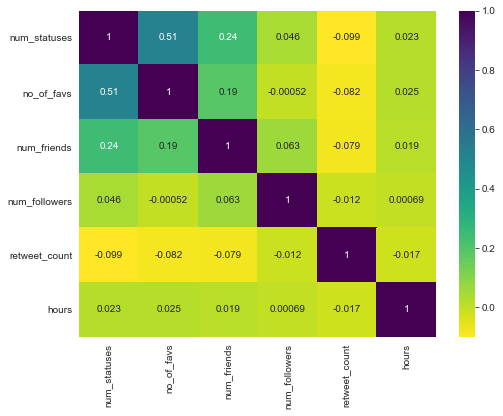

In [88]:
plt.figure(figsize=(8,6))
sns.heatmap(k_df.corr(), cmap='viridis_r', annot=True, )
plt.savefig('correlation_user_metric.png')

### PCA
I dont know if PCA is neccessary in this case since we do no have many features, but I still go ahead to do it, just incase

In [89]:
# Preprocessing

from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()
scaler.fit(k_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [91]:
scale_df = scaler.transform(k_df)

In [94]:
# scale_df.shape
scale_df

array([[ 0.16291524,  0.11565987,  0.28056967, -0.01732062, -0.4217152 ,
         1.06293188],
       [ 1.31029788, -0.56315469, -0.22281151, -0.02862563, -0.4217152 ,
        -0.54045303],
       [-0.56230184, -0.59904447, -0.29875788, -0.03552506, -0.4217152 ,
        -0.54045303],
       ...,
       [-0.40116584, -0.57247625,  0.1586771 ,  0.03226231, -0.4204976 ,
        -1.07491467],
       [-0.57209479, -0.53460519, -0.03835102, -0.03587217, -0.42175325,
         1.06293188],
       [ 0.12728791,  1.50253076, -0.19024376, -0.02719449, -0.42175325,
         1.06293188]])

In [95]:
# PCA  #

In [96]:
from sklearn.decomposition import PCA

In [97]:
pca = PCA(n_components=3)

In [98]:
pca.fit(scale_df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [99]:
# transform this data into its principal components

i_pca = pca.transform(scale_df)

In [100]:
# check shape

# scale_df.shape
i_pca.shape

(223815, 3)

In [101]:
# type(i_pca)
i_pca

array([[ 0.44229132, -0.0399512 ,  1.10108533],
       [ 0.44665982, -0.0059061 , -0.4646227 ],
       [-0.79015512,  0.15890459, -0.29382079],
       ...,
       [-0.50623542,  0.34456191, -0.81872288],
       [-0.55249154,  0.07617793,  1.22993695],
       [ 1.06332512, -0.43226975,  0.96732661]])

Text(0, 0.5, 'Principal Component B')

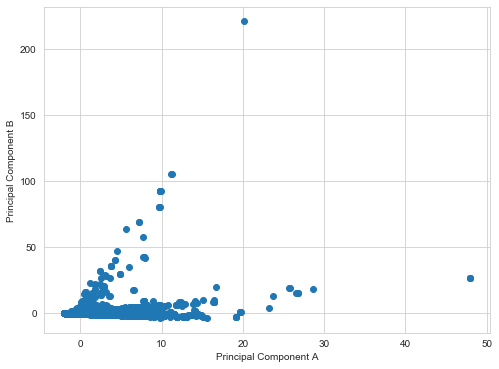

In [102]:
# Visualize the correlation

plt.figure(figsize=(8,6))
plt.scatter(i_pca[:,0], i_pca[:,1])
plt.xlabel("Principal Component A")
plt.ylabel("Principal Component B")

###### Corresponding the PrincComps with original features

In [103]:
pca.components_

array([[ 0.63147482,  0.60739554,  0.42063173,  0.08270729, -0.21216477,
         0.05936983],
       [-0.09647537, -0.20410242,  0.21962129,  0.94135622, -0.09131025,
        -0.07944869],
       [-0.08945929, -0.09821943,  0.00107265,  0.02364597, -0.26926967,
         0.9535636 ]])

In [104]:
df2 = pd.DataFrame(pca.components_, columns=k_df.columns)

In [105]:
df2

,num_statuses,no_of_favs,num_friends,num_followers,retweet_count,hours
0,0.631475,0.607396,0.420632,0.082707,-0.212165,0.059370
1,-0.096475,-0.204102,0.219621,0.941356,-0.091310,-0.079449
2,-0.089459,-0.098219,0.001073,0.023646,-0.269270,0.953564


##### The strength of the correlations can be better seen with heatmap plotting

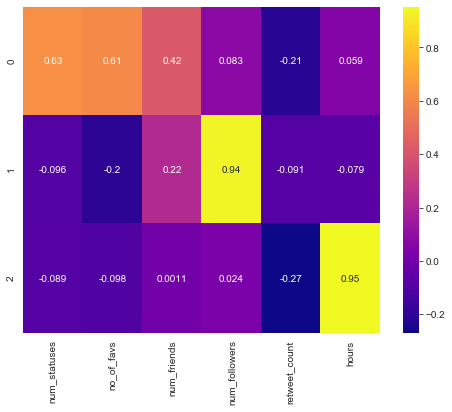

In [106]:
plt.figure(figsize=(8,6))

sns.heatmap(df2,cmap='plasma', annot=True)
plt.savefig("PCA Heatmap.png")

###### Hour of the day, number of statuses, num of favourites ONLY???

In [107]:
from sklearn.cluster import KMeans

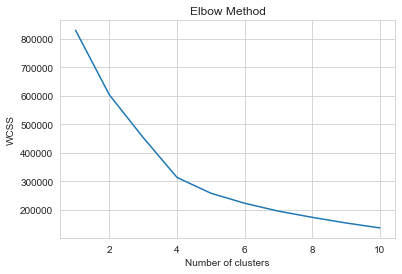

In [108]:
# Using the Elbow method to search for optimal K-Value

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(i_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig("Elbow_Method.png")
plt.show()


###### I determined 4 to be the ideal/optimum value of clusters


In [109]:
kmeans = KMeans(n_clusters=4)

In [110]:
kmeans.fit(i_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [111]:
kmeans.labels_

array([1, 0, 0, ..., 0, 1, 1])

In [112]:
centroids=kmeans.cluster_centers_
kmeans.cluster_centers_

array([[-4.35877824e-01,  6.67283891e-02, -8.44065300e-01],
       [-1.89365355e-01, -2.03462089e-02,  8.61331883e-01],
       [ 3.18683138e+00, -3.21837505e-01, -2.74897687e-01],
       [ 8.78213229e+00,  7.58676580e+01,  1.87973047e+00]])

In [113]:
i_pca.shape

(223815, 3)

In [114]:
i_pca[:,1]

array([-0.0399512 , -0.0059061 ,  0.15890459, ...,  0.34456191,
        0.07617793, -0.43226975])

In [115]:
# plt.scatter(i_pca[:,0], i_pca[:,1],cmap='rainbow')

WARNING - No handles with labels found to put in legend.


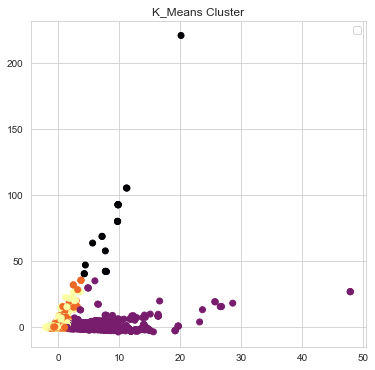

In [116]:
plt.figure(figsize=(6,6))
sns.set_style(style='whitegrid')
plt.title('K_Means Cluster')
plt.scatter(i_pca[:,0], i_pca[:,1], c=kmeans.labels_,cmap='inferno_r')
plt.savefig('final_clusters.png')
plt.legend()

In [117]:
# Alternatively

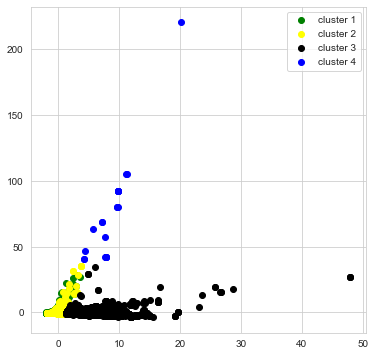

In [121]:
fig, ax = plt.subplots(figsize=(6, 6))

X = plt.scatter(i_pca[kmeans.labels_ == 0, 0], i_pca[kmeans.labels_ == 0, 1],
               c='green', label='cluster 1')
Y = plt.scatter(i_pca[kmeans.labels_ == 1, 0], i_pca[kmeans.labels_ == 1, 1],
            c='yellow', label='cluster 2')
Z = plt.scatter(i_pca[kmeans.labels_ == 2, 0], i_pca[kmeans.labels_ == 2, 1],
            c='black', label='cluster 3')
G= plt.scatter(i_pca[kmeans.labels_ == 3, 0], i_pca[kmeans.labels_ == 3, 1],
            c='blue', label='cluster 4')
plt.legend()

##### 3D Plotting

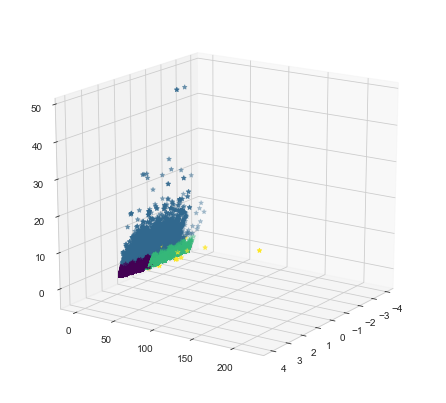

In [159]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(fignum, figsize=(12,9))
ax = Axes3D(fig, rect=[0, 0, .5, 0.6], elev=18, azim=34)  # 
kmeans.fit(i_pca)
labels = kmeans.labels_

ax.scatter3D(i_pca[:, 2], i_pca[:, 1],i_pca[:,0],
           c=kmeans.labels_.astype(np.float), cmap='viridis', marker='*')


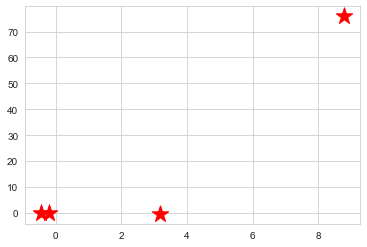

In [119]:
# visualizing the centroids

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r', label='centroid')

#### Prediction

In [48]:
y_pred = kmeans.fit_predict(k_df)

In [49]:
# len(y_pred)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
# creating a new dataframe
final_df = k_df

In [51]:
# adding the label as a columns to dataframe

final_df['label'] = y_pred

In [52]:
final_df

,num_statuses,no_of_favs,num_friends,num_followers,retweet_count,hours,label
0,82270,61044,4568,3675,1,21,0
1,207870,4170,843,1558,1,18,0
2,2883,1163,281,266,1,18,0
3,13197,1999,2541,3429,0,19,0
4,13237,2010,2729,3521,0,22,0
...,...,...,...,...,...,...,...
223810,51762,22979,3440,606,0,17,0
223811,3287,2834,217,286,0,20,0
223812,20522,3389,3666,12960,33,17,0
223813,1811,6562,2208,201,0,21,0


In [53]:
final_df['label'].unique()

array([0, 3, 1, 2])

In [54]:
# Add user names from initial data

final_df[['username','tweet']]= data[['user','full_text']]

In [55]:
final_df.head()

,num_statuses,no_of_favs,num_friends,num_followers,retweet_count,hours,label,username,tweet
0,82270,61044,4568,3675,1,21,0,WorkingMIGirl,"' ""When asked to condemn, he just walked out o..."
1,207870,4170,843,1558,1,18,0,MakeHerWETWest,- LOOK AT GOD 🗣 https://t.co/KxaP6pyZVK
2,2883,1163,281,266,1,18,0,Jet_Blvck_Bitxh,- Put a Meme on this LMFAOOOO #Charlottesville...
3,13197,1999,2541,3429,0,19,0,CramerSez,-\nMore #fakenews from liberals in attempt to ...
4,13237,2010,2729,3521,0,22,0,CramerSez,"-\nThe only reason #MSM, #Democrats, #BlackLiv..."


##### Create new Dataframes for each label categories

In [56]:
cat_2 = final_df[final_df['label'] == 2]
# cat_2

In [57]:
cat_0 = final_df[final_df['label'] == 0]
# cat_0

In [58]:
cat_1 =final_df[final_df['label'] == 1]
# cat_1

In [59]:
cat_3 =final_df[final_df['label'] == 3]
# cat_3

In [60]:
# cat_0.columns[7]

In [61]:
# Create a function to grab the usernames in each label category and their Tweets and write same to a csv file for further 
# qualitative analysis

def user_tweet(x,y,filename=""):
#     count = 0
    file_dict = {}
    user_list = []
    tweet_list= []
    
    for i in x:
        user_list.append(i)
        
    for k in y:
        tweet_list.append(k)
        
    file_dict['users'] = user_list
    file_dict['message'] = tweet_list
    
    
    
    csv_data = pd.DataFrame(file_dict)
    
#     Write dataframe to file
    wrt_file =csv_data.to_csv(filename +'.csv', header=True)
        
    print("File has been written to cwd as '{}.csv'".format(filename))
        
#     return csv_data
        
    

In [62]:
# user_tweet(cat_2['username'], cat_2['tweet'],"cat_2")

File has been written to cwd as 'cat_2.csv'


In [63]:
# user_tweet(cat_0['username'], cat_0['tweet'],"cat_0")

File has been written to cwd as 'cat_0.csv'


In [64]:
# user_tweet(cat_1['username'], cat_1['tweet'],"cat_1")

File has been written to cwd as 'cat_1.csv'


In [65]:
# user_tweet(cat_3['username'], cat_3['tweet'],"cat_3")

File has been written to cwd as 'cat_3.csv'


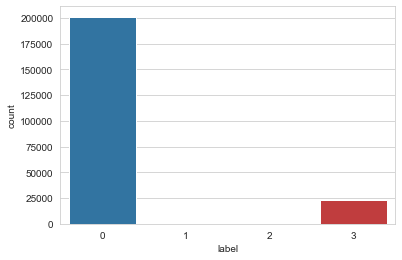

In [66]:
sns.countplot(final_df['label'])

In [67]:
# export Label List to file

lst =final_df['label']
lab_df = pd.DataFrame(lst)
# lab_df
# Write to file for export
lab_df.to_csv("label.csv", header=True)


##### Clusterting Score/Evaluation

In [68]:
from sklearn.metrics import silhouette_score

In [69]:
k_df.columns

Index(['num_statuses', 'no_of_favs', 'num_friends', 'num_followers',
       'retweet_count', 'hours', 'label', 'username', 'tweet'],
      dtype='object')

In [70]:
si_score = silhouette_score(k_df.drop(['label', 'username', 'tweet'], axis=1), y_pred)

ERROR - Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\oluba\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-70-b82e15e0d656>", line 1, in <module>
    si_score = silhouette_score(k_df.drop(['label', 'username', 'tweet'], axis=1), y_pred)
  File "C:\Users\oluba\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "C:\Users\oluba\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 234, in silhouette_samples
    **kwds))
  File "C:\Users\oluba\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py", line 1592, in pairwise_distances_chunked
    n_jobs=n_jobs, **kwds)
  File "C:\Users\oluba\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py", line 1749, in pairwise_distances
    return _parallel_pairwise(X, Y, func, n_jobs, 

KeyboardInterrupt: 

###### si_score of 0.7055793350415035 .....good or close to good? 